<a href="https://colab.research.google.com/github/LhonaPadmayuky/Optimizing-Spam-Filtering/blob/main/Project_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
df=pd.read_csv("/content/spam.csv",encoding = "latin")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.rename({"v1":"label","v2":"text"},inplace=True,axis=1)

In [ ]:
df.tail()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.describe()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.shape

(5572, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df['label'])

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [ ]:
df.head()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

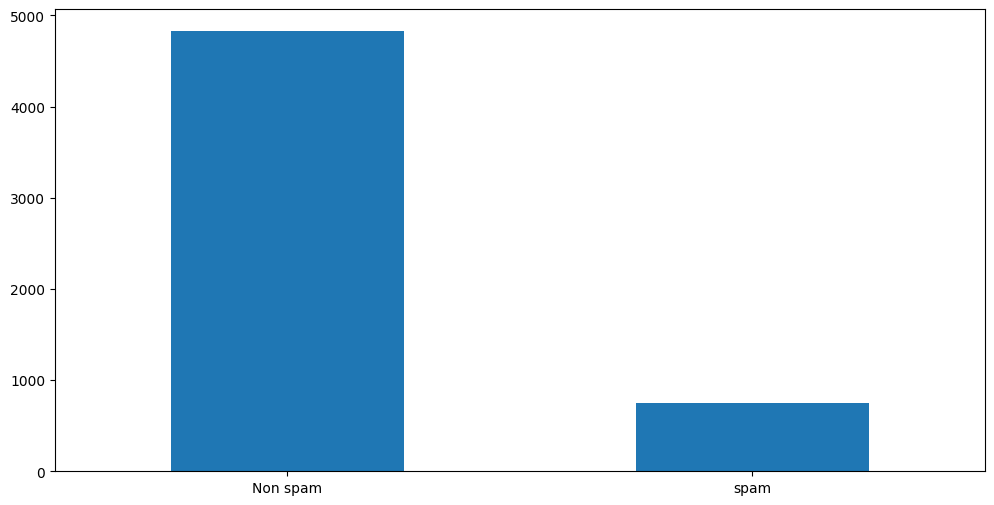

In [ ]:
df["label"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2),('Non spam','spam'),rotation=0);

In [ ]:
import nltk
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import re
corpus = []
length = len(df)

In [ ]:
for i in range(0,length):
     text = re.sub("[^a-zA-z0-9]"," ",df["text"][i])
     text = text.lower()
     text = text.split()
     pe = PorterStemmer()
     stopword = stopwords.words("english")
     text = [pe.stem(word) for word in text if not word in set (stopword)]
     text = " ".join(text)
     corpus.append(text)

In [ ]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

In [ ]:
#ham
df[df['label']==0][['text',]].describe()

,text
count,4825
unique,4516
top,"Sorry, I'll call later"
freq,30


In [ ]:
#spam
df[df['label']==1][['text',]].describe()

,text
count,747
unique,653
top,Please call our customer service representativ...
freq,4


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X=cv.fit_transform(corpus).toarray()



In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:

y=pd.get_dummies(df['label'])
y=y.iloc[:,1].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
import pickle
pickle.dump(cv, open('cv1.pkl','wb'))

In [ ]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X ,y,test_size=0.20,random_state=0)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Oversampling, counts of label '0': {} \n".format(sum(y_train==0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)
print('After Oversampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After Oversampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After Oversampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After Oversampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 581
Before Oversampling, counts of label '0': 3876 

After Oversampling, the shape of train_X: (7752, 7193)
After Oversampling, the shape of train_y: (7752,) 

After Oversampling, counts of label '1': 3876
After Oversampling, counts of label '0': 3876


In [ ]:
df.shape

(5572, 5)

In [ ]:
names = ['label']

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_bal=df[['label']].copy()
x_bal = sc.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal, columns=names)



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X ,y,test_size=0.20,random_state=0)

###**Decision** **Tree** **Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_res,y_train_res)


DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print('Confusion Matrix')
print(cm)

print('Accuracy Score is:',score*100)

Confusion Matrix
[[785 164]
 [ 20 146]]
Accuracy Score is: 83.49775784753362


###**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train_res,y_train_res)


RandomForestClassifier()

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred1

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred1)
score = accuracy_score(y_test,y_pred1)
print('Confusion Matrix')
print(cm)

print('Accuracy Score is:',score*100)

Confusion Matrix
[[858  91]
 [ 15 151]]
Accuracy Score is: 90.49327354260089


###Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(X_train_res, y_train_res)

MultinomialNB()

In [ ]:
y_pred2 = model.predict(X_test)
y_pred2

array([0, 1, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred2)
score = accuracy_score(y_test,y_pred2)
print('Confusion Matrix')
print(cm)

print('Accuracy Score is:',score*100)

Confusion Matrix
[[785 164]
 [ 20 146]]
Accuracy Score is: 83.49775784753362


###**ANN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
X_train.shape

(4457, 7193)

In [ ]:
model.add(Dense(units = X_train_res.shape[1],activation="relu",kernel_initializer="random_uniform"))

In [ ]:
model.add(Dense(units = 100, activation="relu",kernel_initializer="random_uniform"))

In [ ]:
model.add(Dense(units = 1, activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
generator = model.fit(X_train_res,y_train_res,epochs=10,steps_per_epoch=len(X_train_res)//64)

Epoch 1/10
121/121 [==============================] - 137s 1s/step - loss: 0.1316 - accuracy: 0.9584
Epoch 2/10
121/121 [==============================] - 148s 1s/step - loss: 0.0209 - accuracy: 0.9948
Epoch 3/10
121/121 [==============================] - 136s 1s/step - loss: 0.0153 - accuracy: 0.9964
Epoch 4/10
121/121 [==============================] - 138s 1s/step - loss: 0.0134 - accuracy: 0.9969
Epoch 5/10
121/121 [==============================] - 138s 1s/step - loss: 0.0139 - accuracy: 0.9967
Epoch 6/10
121/121 [==============================] - 138s 1s/step - loss: 0.0138 - accuracy: 0.9968
Epoch 7/10
121/121 [==============================] - 150s 1s/step - loss: 0.0125 - accuracy: 0.9973
Epoch 8/10
121/121 [==============================] - 139s 1s/step - loss: 0.0139 - accuracy: 0.9968
Epoch 9/10
121/121 [==============================] - 138s 1s/step - loss: 0.0120 - accuracy: 0.9976
Epoch 10/10
111/121 [==========================>...] - ETA: 11s - loss: 0.0131 - accuracy: 

121/121 [==============================] - 127s 1s/step - loss: 0.0131 - accuracy: 0.9973


###**Testing the model**

In [ ]:
y_pred=model.predict(X_test)
y_pred

35/35 [==============================] - 4s 104ms/step


array([[1.1054722e-16],
       [3.5779285e-03],
       [5.3598747e-21],
       ...,
       [5.2113358e-09],
       [1.2040349e-19],
       [5.4607648e-17]], dtype=float32)

In [ ]:
y_pr = np.where(y_pred>0.5,1,0)

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
cm = confusion_matrix(y_test,y_pr)
score = accuracy_score(y_test,y_pr)
print('Confusion Matrix')
print(cm)

print('Accuracy Score is:',score*100)

Confusion Matrix
[[936  13]
 [ 19 147]]
Accuracy Score is: 97.13004484304932


In [ ]:
loaded_model=model
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]','',new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = cv.transform(new_corpus).toarray()
  print(new_X_test)
  new_y_pred = loaded_model.predict(new_X_test)
  print(new_y_pred)
  new_X_pred = np.where(new_y_pred>0.5,1,0)
  return new_y_pred
new_review = new_review(str(input("Enter new review...")))


Enter new review...hello 
[[0 0 0 ... 0 0 0]]
1/1 [==============================] - 0s 45ms/step
[[0.9610503]]


In [ ]:
model.save('spam.h5')